# Micro-Credit Defaulter Model

Problem Statement: 
    
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


# Importing Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset

In [2]:
df=pd.read_csv("Data file.csv")  # read the data
df

,unknown,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


Observations:
    1)From dataset we can see that there are unnecessary columns are present like unknown.
    2)Null Values are present.
    3) No. of 209593 rows & No. of 37 columns are present in the dataset.

# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(df.shape)
print("-"*60)
print(df.isna().sum())
print("-"*60)
#printing the summary of data type
df.info() 

(209593, 37)
------------------------------------------------------------
unknown                 0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle         

In [4]:
# Lets first delate the irrelavant columns
df.drop(columns=['unknown','msisdn'],axis=1, inplace=True)

In [5]:
#Recheck the Dataset
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,20-07-2016
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,10-08-2016


# Statistical Summary

In [6]:
# Lets understand data at high level check the stastics of dataset
df.describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,04-07-2016
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


Observations: 1) Irrelevant values are present 2)we have categorical data type(object type) 3)outliers are present in the dataset 4)in some columns thre is too much diffrance between mean and std. deviation

Also, we have seen that there are no null values lets check by visualization also for the null values.

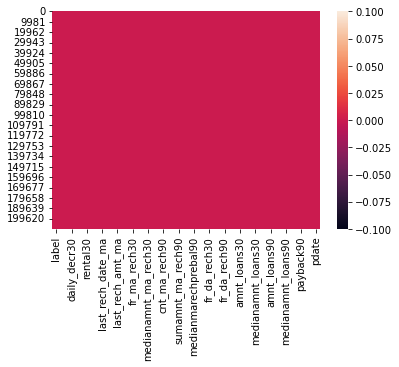

In [7]:
# Checking null value by plotting heatmap
sns.heatmap(df.isnull())
plt.show()

In [7]:
#first remove duplicates & recheck the size
df.drop_duplicates(inplace=True)

print(df.shape)

(209562, 35)


Found duplicates and deleated.

# Data_Description

label	=	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

msisdn	=	mobile number of user

aon	=	age on cellular network in days

daily_decr30	=	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

daily_decr90	=	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

rental30	=	Average main account balance over last 30 days

rental90	=	Average main account balance over last 90 days

last_rech_date_ma	=	Number of days till last recharge of main account

last_rech_date_da	=	Number of days till last recharge of data account

last_rech_amt_ma	=	Amount of last recharge of main account (in Indonesian Rupiah)

cnt_ma_rech30	=	Number of times main account got recharged in last 30 days

fr_ma_rech30	=	Frequency of main account recharged in last 30 days

sumamnt_ma_rech30	=	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

medianamnt_ma_rech30	=	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

medianmarechprebal30	=	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

cnt_ma_rech90	=	Number of times main account got recharged in last 90 days

fr_ma_rech90	=	Frequency of main account recharged in last 90 days

sumamnt_ma_rech90	=	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

medianamnt_ma_rech90	=	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

medianmarechprebal90	=	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

cnt_da_rech30	=	Number of times data account got recharged in last 30 days

fr_da_rech30	=	Frequency of data account recharged in last 30 days

cnt_da_rech90	=	Number of times data account got recharged in last 90 days

fr_da_rech90	=	Frequency of data account recharged in last 90 days

cnt_loans30	=	Number of loans taken by user in last 30 days

amnt_loans30	=	Total amount of loans taken by user in last 30 days

maxamnt_loans30	=	maximum amount of loan taken by the user in last 30 days

medianamnt_loans30	=	Median of amounts of loan taken by the user in last 30 days

cnt_loans90	=	Number of loans taken by user in last 90 days

amnt_loans90	=	Total amount of loans taken by user in last 90 days

maxamnt_loans90	=	maximum amount of loan taken by the user in last 90 days

medianamnt_loans90	=	Median of amounts of loan taken by the user in last 90 days

payback30	=	Average payback time in days over last 30 days

payback90	=	Average payback time in days over last 90 days

pcircle	=	telecom circle

pdate	=	date

# EDA

In [8]:
# As we have date column so lets separate the day, month & year 
df['pdate']=pd.to_datetime(df['pdate'])
df['year']=df['pdate'].dt.year
df['day']=df['pdate'].dt.day
df['month']=df['pdate'].dt.month

# lest delete the pdate column as we have alreday seaprated
df=df.drop(columns='pdate', axis=1)

In [9]:
df.head(3)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,day,month
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.0,29.0,UPW,2016,20,7
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.0,0.0,UPW,2016,8,10
2,1,535.0,1398.00,1398.00,900.13,900.13,3.0,0.0,1539,1,...,1.0,6,6,0.0,0.0,0.0,UPW,2016,19,8


# Data preprocessing

As our dataset has objective type data so lets first seaparate them and covert them into int by using Encoding method.

In [10]:
l=['float16','int32','int64','int8','int16','float32','float64']
cat_col=[] #Empty list
features=df.columns.values.tolist()
for i in features:
    if df[i].dtype in l:
        continue
    cat_col.append(i)
cat_col

['pcircle']

In [11]:
df['pcircle'].value_counts()

UPW    209562
Name: pcircle, dtype: int64

As we seen df['pcircle'] features there is only one category UPW so lets convert it by using lable encoder.

In [12]:
# Lets frist covert categorical data(type & column) into int 
lable=LabelEncoder()
data=lable.fit_transform(df['pcircle'])
pd.Series(data)
df["pcircle"]=data

In [13]:
df.head(2)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,day,month
0,0,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,2,...,2.0,12,6,0.0,29.0,29.0,0,2016,20,7
1,1,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,5787,1,...,1.0,12,12,0.0,0.0,0.0,0,2016,8,10


Now data looks good, but as we seen the data set has negative & irrelavant values so lets fix this first.

# Data Visualization

# Univariate Plots

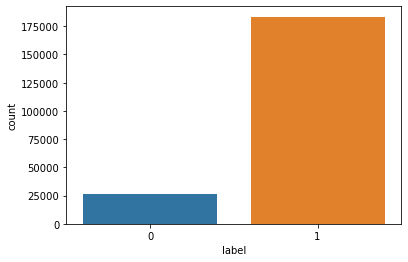

1    183429
0     26133
Name: label, dtype: int64


In [15]:
#plot each class frequency
sns.countplot(x='label',data=df)
plt.show()
print(df['label'].value_counts())

From above graph we can see that the amount of people who has paid back the credit amount within 5 days of issuing the loan is 183429 and those who not paid within 5 days are 26133.

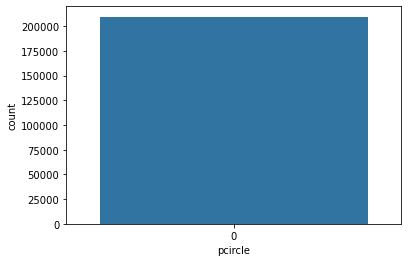

0    209562
Name: pcircle, dtype: int64


In [16]:
#plot each class frequency
sns.countplot(x='pcircle',data=df)
plt.show()
print(df['pcircle'].value_counts())

As we see there is only one  telecom circle

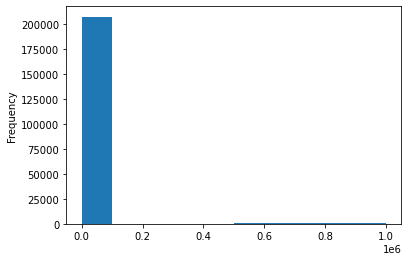

95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
              ... 
977092.3520      1
645851.0384      1
881623.8154      1
555267.7977      1
811881.3728      1
Name: aon, Length: 4507, dtype: int64


In [17]:
#plot each class frequency
df['aon'].plot.hist()
plt.show()
print(df['aon'].value_counts())

As we see from graph the maximum age on cellular network in days is 95

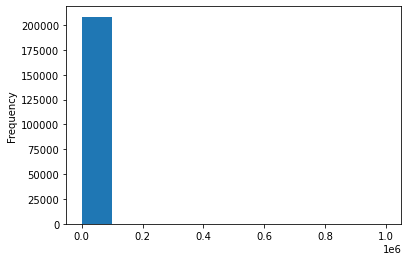

0.0000         78653
1.0000         22369
2.0000         18849
3.0000         14306
4.0000         11194
               ...  
967338.1316        1
779697.8460        1
723333.5198        1
891246.0040        1
747564.0753        1
Name: fr_ma_rech30, Length: 1083, dtype: int64


In [18]:
#plot each class frequency
df['fr_ma_rech30'].plot.hist()
plt.show()
print(df['fr_ma_rech30'].value_counts())

From graph we can see that the maximum Frequency of main account recharged in last 30 days is 0 & least is 747564.

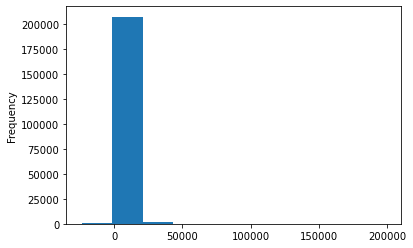

0.00       7537
200.13     1379
99.56      1020
400.26      530
199.12      461
           ... 
824.85        1
517.35        1
6526.31       1
4184.14       1
483.92        1
Name: rental30, Length: 131338, dtype: int64


In [19]:
df['rental30'].plot.hist()
plt.show()
print(df['rental30'].value_counts())

The max frequency of Average main account balance over last 30 days is 7537.

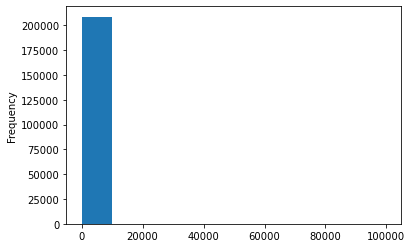

6.00000        179162
12.00000        26109
0.00000          3244
17083.99814         1
62511.75070         1
                ...  
30346.38585         1
66821.81906         1
55716.81724         1
41580.15663         1
96927.24325         1
Name: maxamnt_loans30, Length: 1050, dtype: int64


In [20]:
df['maxamnt_loans30'].plot.hist()
plt.show()
print(df['maxamnt_loans30'].value_counts())

From graph we can see the maximum amount of loan taken by the user in last 30 days is 6 & 12(In indoneshian Rupeh)

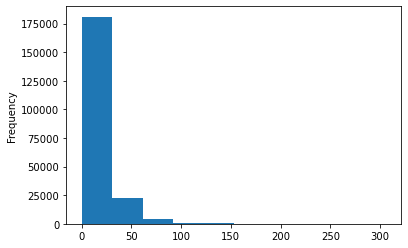

6      76590
12     44384
18     26379
24     18402
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
150       30
144       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
252        4
210        4
228        4
216        4
222        3
258        3
264        3
276        3
240        2
204        2
246        1
300        1
270        1
306        1
Name: amnt_loans30, dtype: int64


In [21]:
df['amnt_loans30'].plot.hist()
plt.show()
print(df['amnt_loans30'].value_counts())

From graph we can see the Total amount of loans taken by user in last 30 days is 6 & 12(In indoneshian Rupeh)

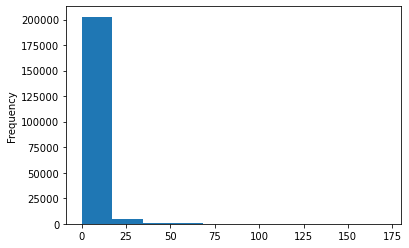

0.000000     106682
2.000000       5601
3.000000       5023
4.000000       3931
2.500000       3518
              ...  
48.400000         1
3.133333          1
1.518519          1
1.212121          1
5.615385          1
Name: payback30, Length: 1363, dtype: int64


In [22]:
df['payback30'].plot.hist()
plt.show()
print(df['payback30'].value_counts())

From graph we can see the Average payback time in days over last 30 days is 0

# Bivariate Plot

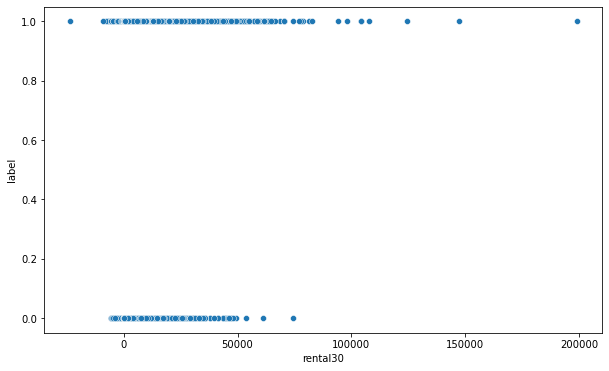

label  rental30 
0      0.00         3626
       99.56         157
       200.13        110
       434.78         85
       24.00          57
                    ... 
1      104277.59       1
       107663.98       1
       124355.64       1
       147045.42       1
       198926.11       1
Name: rental30, Length: 137334, dtype: int64


In [23]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.scatterplot(x ='rental30', y ='label', data = df)
plt.show()
print(df.groupby("label")['rental30'].value_counts())

From graph we can see that the success of user paid back the credit amount within 5 days of issuing the loan has above 100000 (In Indonesian Rupiah) Average main account balance over last 30 days

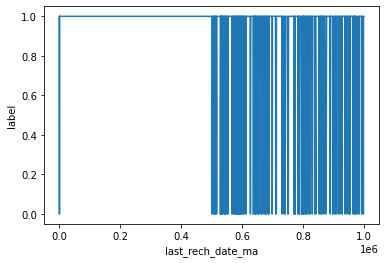

In [24]:
#Bivariant graph
plt.figure(figsize =(6, 4))
sns.lineplot(x ='last_rech_date_ma', y ='label', data = df)
plt.show()

From graph we can see the those who has paid back credit amount within 5 days those user has at least once recharge of main account, similarly those who have not paid they have not recharge there main account.

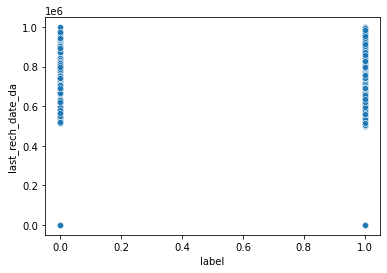

In [25]:
#Bivariant graph
plt.figure(figsize =(6, 4))
sns.scatterplot(y ='last_rech_date_da', x ='label', data = df)
plt.show()

From graph we can see there are similar user those who paid the credit amount and recharge the data account & those who not paid the credit amount within 5 days who recharge the data account.

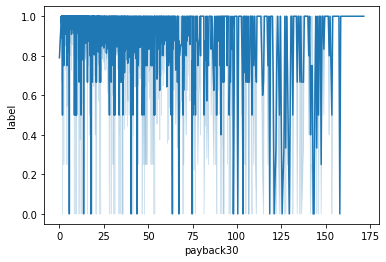

In [26]:
#Bivariant graph
plt.figure(figsize =(6, 4))
sns.lineplot(x ='payback30', y ='label', data = df)
plt.show()

From graph we can see target variable & payback30 feature has linear relation.

# Lets Check Correlation

In [14]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,year,day,month
label,1.000000,-0.003825,0.168174,0.166034,0.057886,0.075339,0.003705,0.001687,0.131558,0.237120,...,0.004707,0.199649,0.084064,0.035681,0.048213,0.049050,NaN,NaN,0.019932,0.005111
aon,-0.003825,1.000000,0.001096,0.000366,-0.000969,-0.000799,0.001691,-0.001694,0.004243,-0.003162,...,-0.000612,-0.002329,-0.001196,0.002767,0.001936,0.002199,NaN,NaN,0.000250,0.000907
daily_decr30,0.168174,0.001096,1.000000,0.977703,0.442038,0.458950,0.000481,-0.001641,0.275787,0.451347,...,0.008956,0.563473,0.400184,-0.037325,0.026891,0.047148,NaN,NaN,0.024844,0.101723
daily_decr90,0.166034,0.000366,0.977703,1.000000,0.434658,0.471705,0.000903,-0.001892,0.264082,0.426670,...,0.009440,0.567182,0.397237,-0.034705,0.019377,0.040775,NaN,NaN,-0.009200,0.122794
rental30,0.057886,-0.000969,0.442038,0.434658,1.000000,0.955235,-0.001101,0.003255,0.127204,0.233281,...,0.004005,0.298902,0.234190,-0.035510,0.072942,0.095114,NaN,NaN,0.050912,0.073432
rental90,0.075339,-0.000799,0.458950,0.471705,0.955235,1.000000,-0.001694,0.002788,0.121351,0.230199,...,0.005134,0.327397,0.251008,-0.034143,0.067083,0.099473,NaN,NaN,0.019892,0.099179
last_rech_date_ma,0.003705,0.001691,0.000481,0.000903,-0.001101,-0.001694,1.000000,0.001790,-0.000156,0.004302,...,-0.000226,0.000863,-0.001126,0.002768,-0.002235,-0.001586,NaN,NaN,0.000752,-0.000923
last_rech_date_da,0.001687,-0.001694,-0.001641,-0.001892,0.003255,0.002788,0.001790,1.000000,-0.000158,0.001540,...,-0.000973,0.000512,0.001520,-0.002241,0.000075,0.000414,NaN,NaN,0.000654,-0.000530
last_rech_amt_ma,0.131558,0.004243,0.275787,0.264082,0.127204,0.121351,-0.000156,-0.000158,1.000000,-0.002778,...,0.000083,0.013985,0.148427,0.020976,-0.027408,-0.014304,NaN,NaN,0.032643,0.023370
cnt_ma_rech30,0.237120,-0.003162,0.451347,0.426670,0.233281,0.230199,0.004302,0.001540,-0.002778,1.000000,...,0.014694,0.685232,0.174072,-0.071486,0.043565,0.017304,NaN,NaN,0.079928,0.024780


From above .corr method we can sse the correlation between independant variable and dependant variable. There are some +ve and -ve correlation with target variable of independant variable. Lets visualise the same by plotting the heatmap.

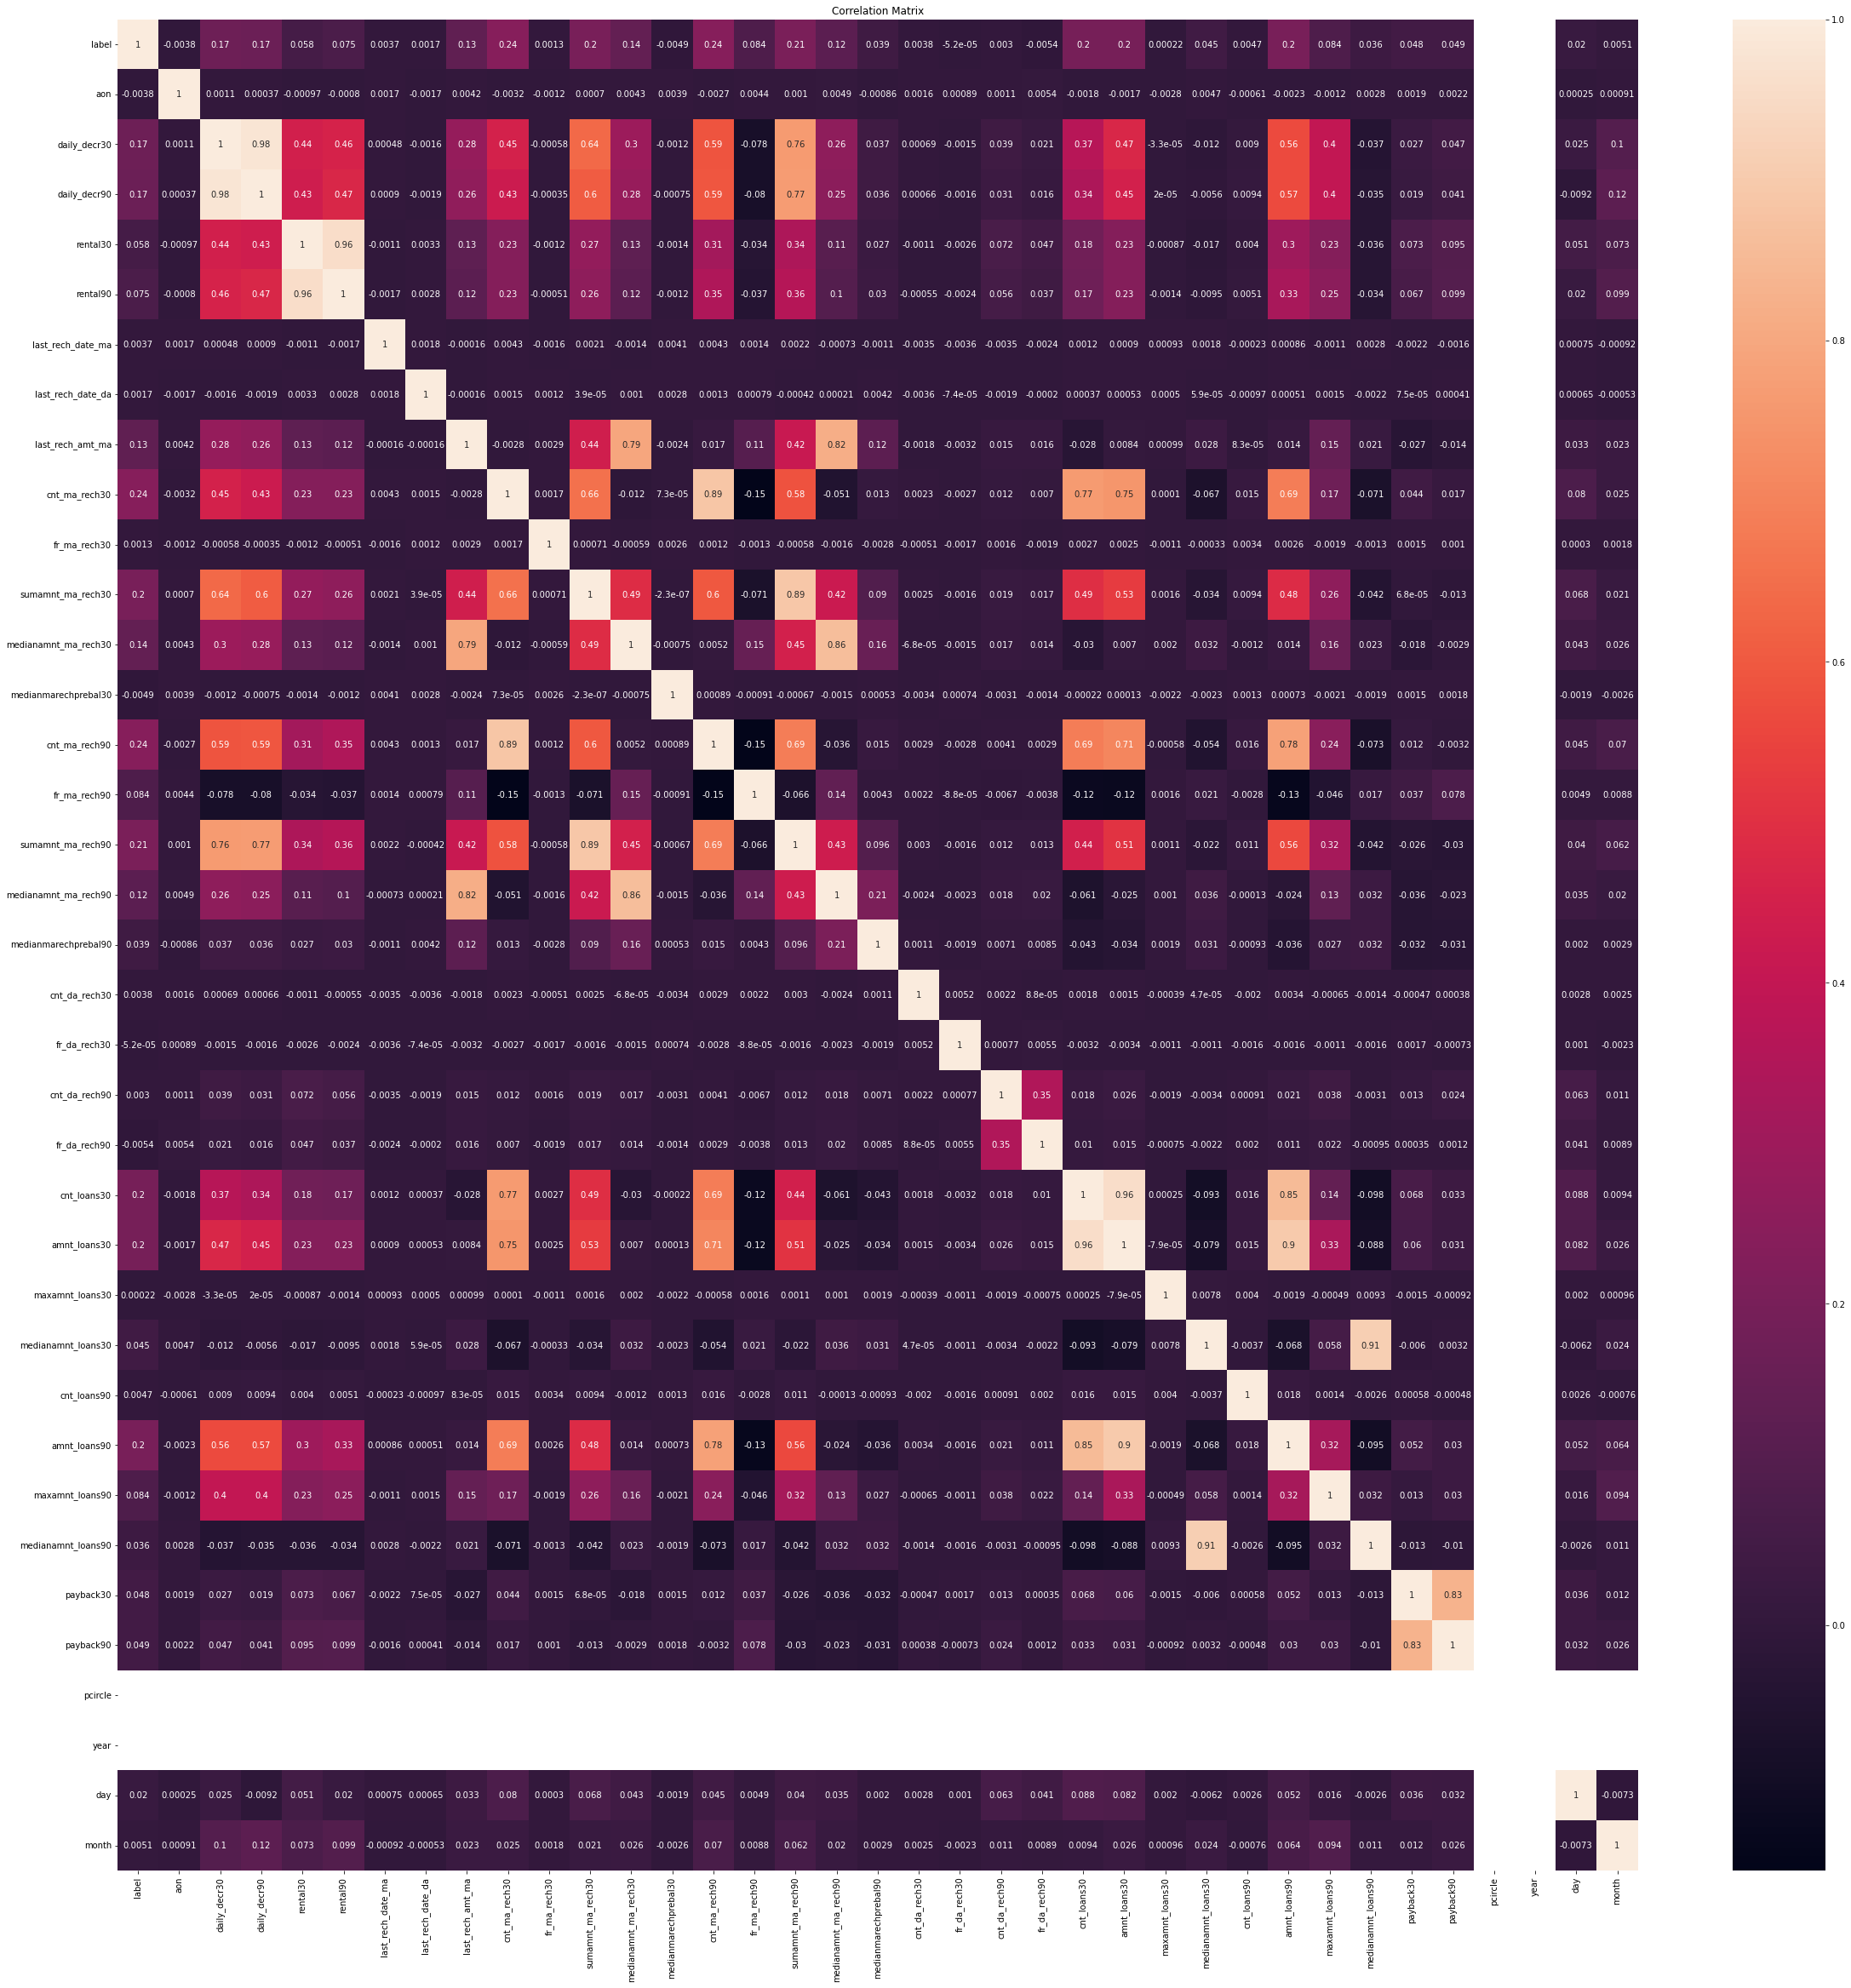

In [28]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation Matrix")
plt.savefig('Colinearity.png')
plt.show()


As we have huge no of columns we cant see heatmap clearly so lets print them same.

In [15]:
# Check correlation with target variable
df.corr()['label'].sort_values(ascending = False)

label                   1.000000
cnt_ma_rech30           0.237120
cnt_ma_rech90           0.236200
sumamnt_ma_rech90       0.205634
sumamnt_ma_rech30       0.202658
amnt_loans90            0.199649
amnt_loans30            0.197123
cnt_loans30             0.196133
daily_decr30            0.168174
daily_decr90            0.166034
medianamnt_ma_rech30    0.141248
last_rech_amt_ma        0.131558
medianamnt_ma_rech90    0.120594
fr_ma_rech90            0.084205
maxamnt_loans90         0.084064
rental90                0.075339
rental30                0.057886
payback90               0.049050
payback30               0.048213
medianamnt_loans30      0.044521
medianmarechprebal90    0.039228
medianamnt_loans90      0.035681
day                     0.019932
month                   0.005111
cnt_loans90             0.004707
cnt_da_rech30           0.003806
last_rech_date_ma       0.003705
cnt_da_rech90           0.002962
last_rech_date_da       0.001687
fr_ma_rech30            0.001306
maxamnt_lo

Now we can easily see who much the independent variable correlated with target variable. In our dataset we have almost 14 independant variable who has less than 0.01 correlation value(very week relationship). we will removeing the same.

In [16]:
# Removing very less correlated independant variable with target variable
df.drop(columns=['month','cnt_loans90','cnt_da_rech30','last_rech_date_ma','cnt_da_rech90','last_rech_date_da','fr_ma_rech30','maxamnt_loans30','fr_da_rech30','aon','medianmarechprebal30','fr_da_rech90','pcircle','year'],axis=1, inplace=True)

# Data Distribution

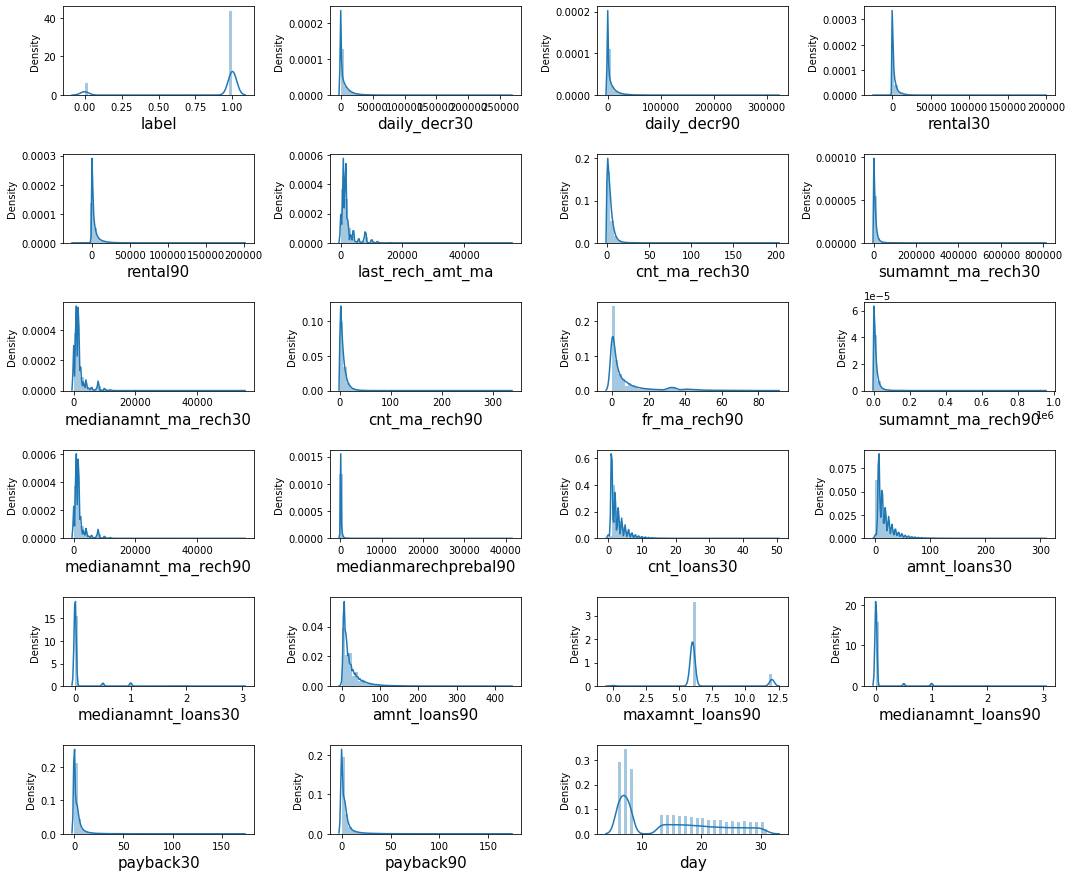

In [31]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From graph we can see that the almost every columns have skewness, now lets check with skew values also.

In [17]:
# Check skewness by skew value
df.skew().sort_values(ascending=False)

medianmarechprebal90    44.877678
payback30                8.311013
payback90                6.900024
sumamnt_ma_rech30        6.386845
sumamnt_ma_rech90        4.897896
medianamnt_loans90       4.895315
medianamnt_loans30       4.550661
rental30                 4.521743
rental90                 4.437471
daily_decr90             4.252312
daily_decr30             3.945997
last_rech_amt_ma         3.781206
medianamnt_ma_rech90     3.752792
medianamnt_ma_rech30     3.512361
cnt_ma_rech90            3.425285
cnt_ma_rech30            3.283935
amnt_loans90             3.149830
amnt_loans30             2.975560
cnt_loans30              2.713259
fr_ma_rech90             2.285206
maxamnt_loans90          1.678078
day                      0.473280
label                   -2.271915
dtype: float64

As we see there are almost in every independant variable has skewd data. As we see the skewed data is present as per thumb rule +0.5/-0.5 weight lets work on right skewed data by using power transform. As label is our target variable so we are not using the same.

In [18]:
# Separate the skewed columns
df1=['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'medianamnt_loans30', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'day']

# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
df[df1]=pt.fit_transform(df[df1].values)

In [19]:
df[df1]

,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,...,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day
0,0.331978,0.299002,-0.580876,-0.568498,0.083117,-0.275898,-0.178281,0.208319,-0.577747,1.335307,...,-0.325884,0.011599,-0.097720,-0.269073,-0.251028,-0.285637,-0.248291,1.813345,1.784020,0.839662
1,1.115924,1.044977,0.339622,0.147972,1.501371,-0.799702,0.219532,1.632552,-1.028323,-1.207236,...,-0.002785,-0.913134,-0.097720,-0.269073,-0.251028,2.325643,-0.248291,-0.937512,-1.019040,-0.773129
2,-0.007711,-0.028405,-0.367064,-0.409143,0.083117,-0.799702,-0.535808,0.208319,-1.028323,-1.207236,...,0.023705,-0.913134,-0.894900,-0.269073,-1.005852,-0.285637,-0.248291,-0.937512,-1.019040,0.752265
3,-1.031704,-1.022957,-0.603147,-0.597817,-0.291448,-1.694612,-1.902672,-1.962288,-1.028323,-1.207236,...,-0.371008,0.011599,-0.097720,-0.269073,-0.251028,-0.285637,-0.248291,-0.937512,-1.019040,-1.292380
4,-0.682563,-0.681151,-0.310574,-0.364309,0.449348,0.992161,1.262697,0.574988,0.657654,-0.061210,...,-0.143033,1.570369,1.454843,-0.269073,1.097749,-0.285637,-0.248291,0.639030,0.431226,1.000915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.680683,-0.679320,-0.313295,-0.366467,1.051147,0.095888,0.663847,0.903801,-0.256309,-0.061210,...,0.145271,0.011599,-0.097720,-0.269073,-0.251028,-0.285637,-0.248291,0.094783,-0.098517,0.561331
209589,-0.950437,-0.943048,-0.140760,-0.229946,-0.429940,0.384349,-0.175684,-0.303710,0.373159,-0.061210,...,0.234915,0.556174,0.393077,-0.269073,0.192079,-0.285637,-0.248291,0.094783,-0.098517,-1.292380
209590,1.100356,1.033316,0.825282,1.022357,0.083117,0.620092,0.575587,0.208319,0.984703,0.509193,...,-0.075402,0.924503,1.454843,-0.269073,1.358344,2.325643,-0.248291,0.974121,0.752752,1.459452
209591,1.135963,1.068277,-0.515701,-0.389916,-0.429940,0.620092,0.795441,-0.303710,0.373159,0.369062,...,0.182516,0.011599,0.393077,-0.269073,0.503566,2.325643,-0.248291,-0.937512,1.337744,1.214774


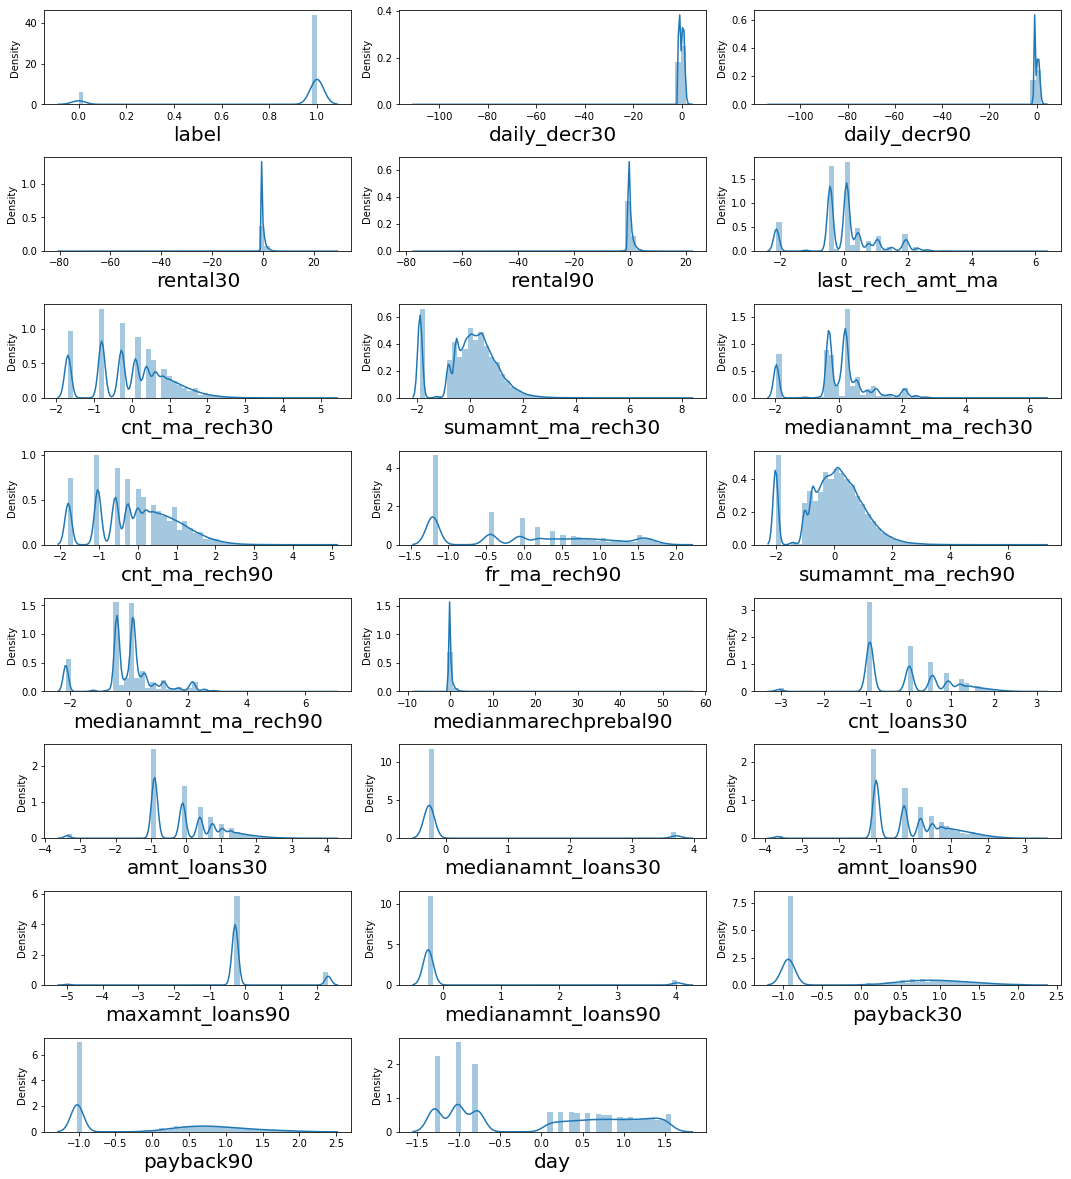

In [35]:
# Distribution or Graphical analysis after Power transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great the skewness are removed and data look good, now lets move further to check Outliers.

In [20]:
df.shape

(209562, 23)

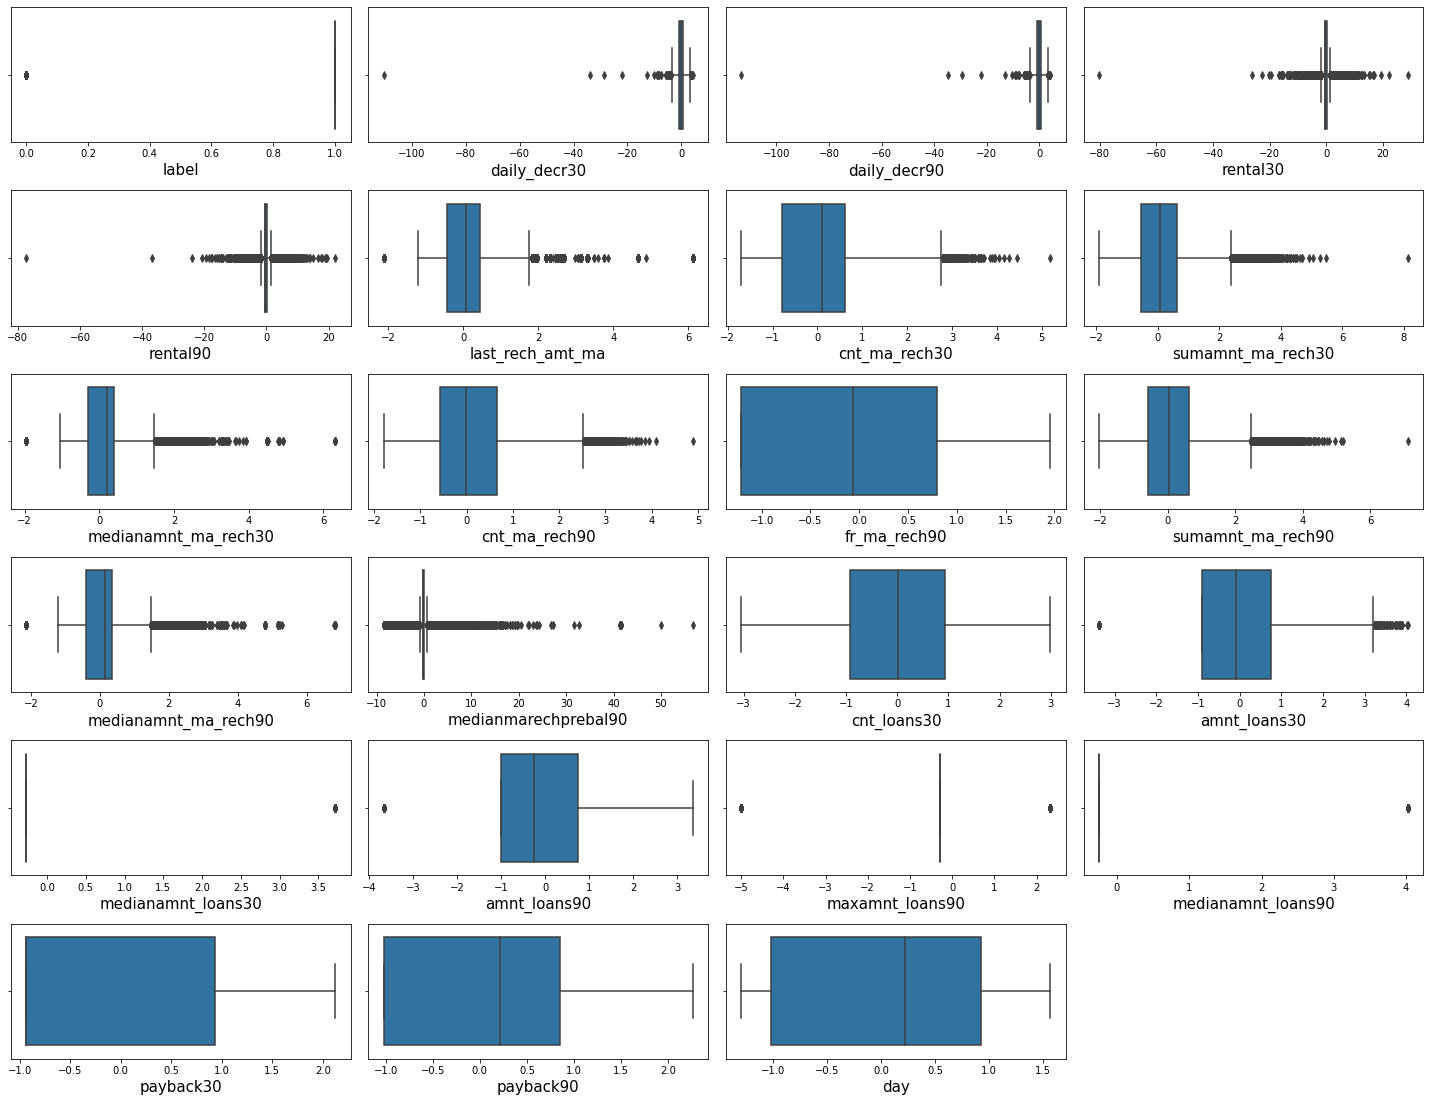

In [23]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

As we seen in almost every columns we have high and low outliers. So, lets deal with by using zscore.

In [21]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(df[['daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'cnt_ma_rech90','sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'amnt_loans30','amnt_loans90',
       'maxamnt_loans90']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=df[filtering_entry]

In [22]:
data

,label,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,...,medianmarechprebal90,cnt_loans30,amnt_loans30,medianamnt_loans30,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,day
0,0,0.331978,0.299002,-0.580876,-0.568498,0.083117,-0.275898,-0.178281,0.208319,-0.577747,...,-0.325884,0.011599,-0.097720,-0.269073,-0.251028,-0.285637,-0.248291,1.813345,1.784020,0.839662
1,1,1.115924,1.044977,0.339622,0.147972,1.501371,-0.799702,0.219532,1.632552,-1.028323,...,-0.002785,-0.913134,-0.097720,-0.269073,-0.251028,2.325643,-0.248291,-0.937512,-1.019040,-0.773129
2,1,-0.007711,-0.028405,-0.367064,-0.409143,0.083117,-0.799702,-0.535808,0.208319,-1.028323,...,0.023705,-0.913134,-0.894900,-0.269073,-1.005852,-0.285637,-0.248291,-0.937512,-1.019040,0.752265
3,1,-1.031704,-1.022957,-0.603147,-0.597817,-0.291448,-1.694612,-1.902672,-1.962288,-1.028323,...,-0.371008,0.011599,-0.097720,-0.269073,-0.251028,-0.285637,-0.248291,-0.937512,-1.019040,-1.292380
4,1,-0.682563,-0.681151,-0.310574,-0.364309,0.449348,0.992161,1.262697,0.574988,0.657654,...,-0.143033,1.570369,1.454843,-0.269073,1.097749,-0.285637,-0.248291,0.639030,0.431226,1.000915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,-0.680683,-0.679320,-0.313295,-0.366467,1.051147,0.095888,0.663847,0.903801,-0.256309,...,0.145271,0.011599,-0.097720,-0.269073,-0.251028,-0.285637,-0.248291,0.094783,-0.098517,0.561331
209589,1,-0.950437,-0.943048,-0.140760,-0.229946,-0.429940,0.384349,-0.175684,-0.303710,0.373159,...,0.234915,0.556174,0.393077,-0.269073,0.192079,-0.285637,-0.248291,0.094783,-0.098517,-1.292380
209590,1,1.100356,1.033316,0.825282,1.022357,0.083117,0.620092,0.575587,0.208319,0.984703,...,-0.075402,0.924503,1.454843,-0.269073,1.358344,2.325643,-0.248291,0.974121,0.752752,1.459452
209591,1,1.135963,1.068277,-0.515701,-0.389916,-0.429940,0.620092,0.795441,-0.303710,0.373159,...,0.182516,0.011599,0.393077,-0.269073,0.503566,2.325643,-0.248291,-0.937512,1.337744,1.214774


In [23]:
print(data.shape, df.shape)

(197600, 23) (209562, 23)


In [24]:
# Percentage of dataloss
data_loss=((209562-197600)/209562)*100
data_loss

5.708095933423044

Now can see we have 5.7% data loss has been done.

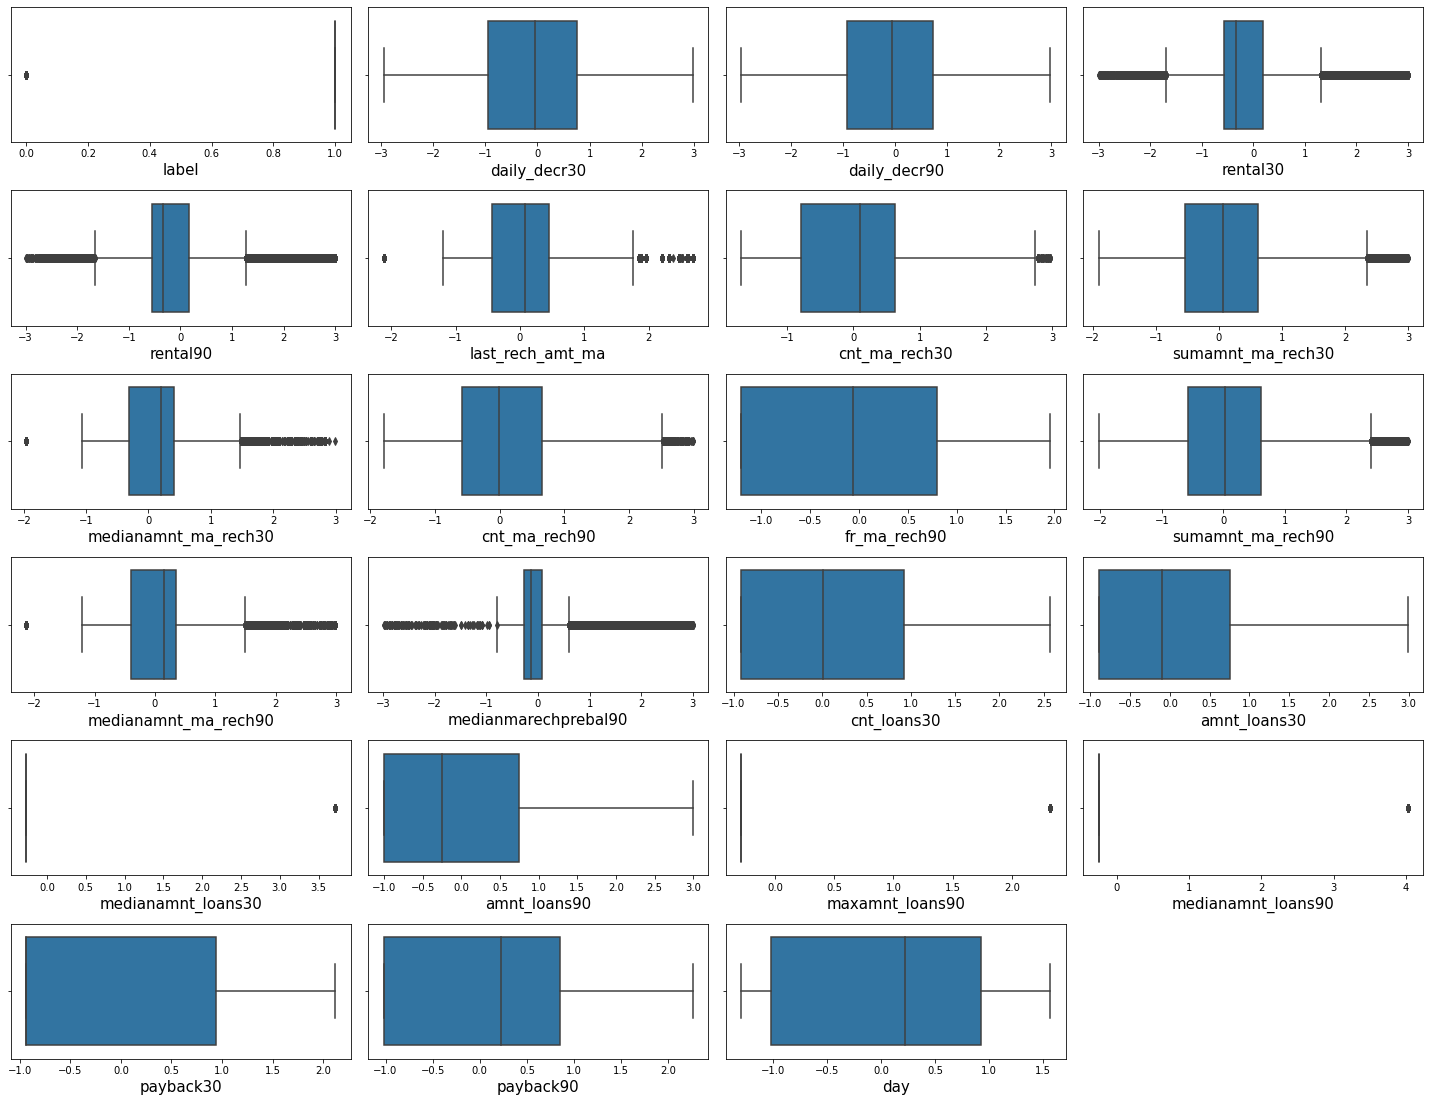

In [28]:
#Let's see the distribution after removing outliers by using box plot 
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now outliers are removed and our data looks great so , lets move further.

In [25]:
# Divide the dataset into features & target variable for further treatment
x=data.drop('label',axis=1)
y=data['label']
print(x.shape, y.shape)

(197600, 22) (197600,)


# data stadardization

In [26]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [27]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

           vif               featurs
0   247.347730          daily_decr30
1   263.018606          daily_decr90
2    14.697168              rental30
3    16.293092              rental90
4     6.378419      last_rech_amt_ma
5    58.058514         cnt_ma_rech30
6    90.431213     sumamnt_ma_rech30
7    18.720390  medianamnt_ma_rech30
8    62.226058         cnt_ma_rech90
9     1.358868          fr_ma_rech90
10   86.446115     sumamnt_ma_rech90
11   18.502059  medianamnt_ma_rech90
12    1.167987  medianmarechprebal90
13   83.350627           cnt_loans30
14   93.977285          amnt_loans30
15    4.855018    medianamnt_loans30
16   16.798993          amnt_loans90
17    4.836660       maxamnt_loans90
18    4.865911    medianamnt_loans90
19    5.751727             payback30
20    5.430832             payback90
21    1.048041                   day


In [28]:
# Lets make thumb rule we can drop the columns if VIF values are more than the 10 pvalue
index=np.where(vif['vif']>20)
vif.loc[index]

,vif,featurs
0,247.347730,daily_decr30
1,263.018606,daily_decr90
5,58.058514,cnt_ma_rech30
6,90.431213,sumamnt_ma_rech30
8,62.226058,cnt_ma_rech90
10,86.446115,sumamnt_ma_rech90
13,83.350627,cnt_loans30
14,93.977285,amnt_loans30


Looking into the vif factors most of values is greter so lets set pvalue 20 instead of 10 to avoid more data loss.
As we see the pvalues of above predictors is more than 20 so lets drop the only first two to avoid data loss & reduce the colinarity.

In [29]:
# Agian Divide the dataset into features & target variable for further treatment
x=data.drop(columns=['label','daily_decr30','daily_decr90'],axis=1)
y=data['label']
print(x.shape, y.shape)

(197600, 20) (197600,)


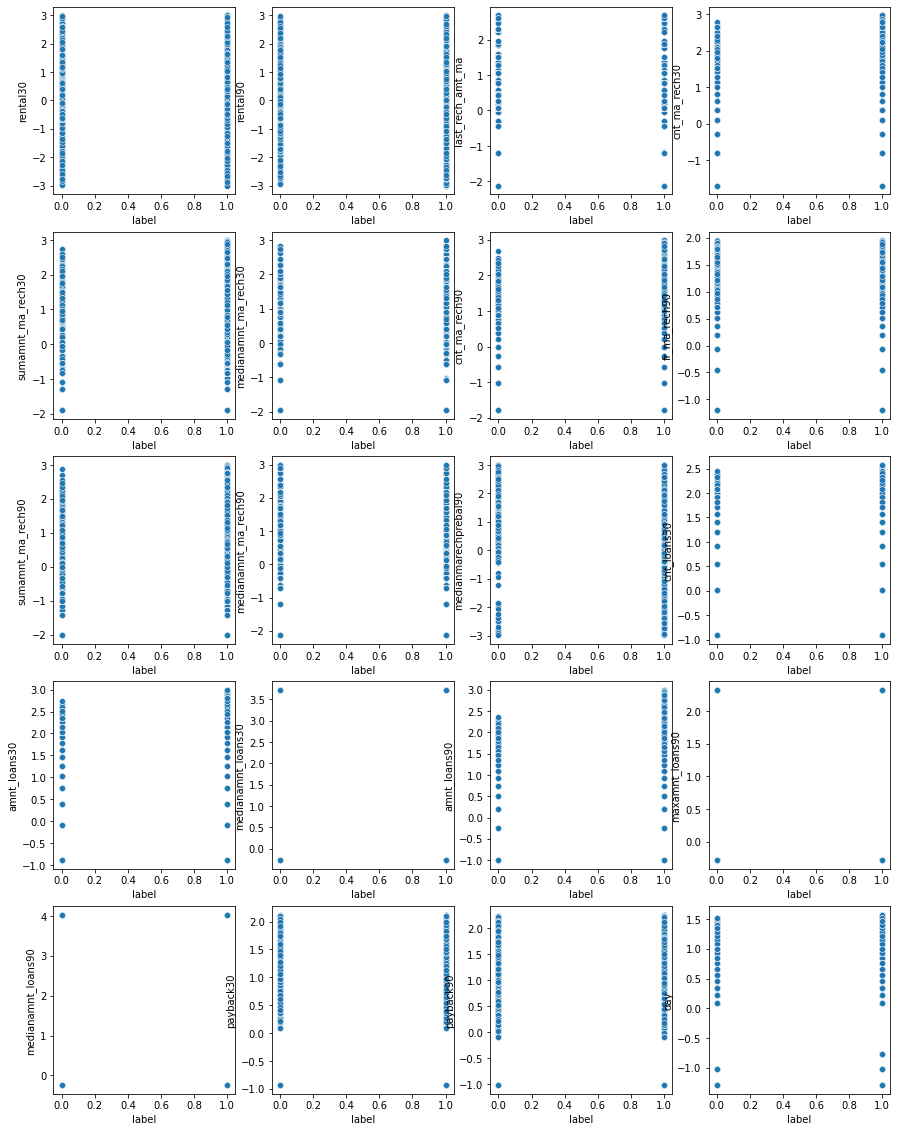

In [34]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.scatterplot(y,x[column])
    plotnumber+=1
plt.show()

As we our dataset has multicolinarity lets use PCA to reduce dimentions.

In [30]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [31]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 0.2964156 , -0.46131619, -0.61766874, ...,  0.02154753,
        -0.04697452,  0.01565578],
       [-0.05714356,  2.69129612, -0.45216838, ...,  0.1027914 ,
        -0.18096615, -0.0228583 ],
       [-2.54531152,  1.18956711, -0.6753011 , ..., -0.0040149 ,
        -0.00415945,  0.01598871],
       ...,
       [ 3.58441721, -1.27679805,  0.57235041, ..., -0.03398495,
        -0.0817869 , -0.07073232],
       [ 1.47531271,  0.11978663, -0.16112671, ...,  0.3598845 ,
         0.141453  , -0.13130744],
       [ 1.57546767,  3.70395399, -0.92921932, ...,  0.14396122,
         0.11075962, -0.05282273]])

Text(0.5, 1.0, 'PCA Plot')

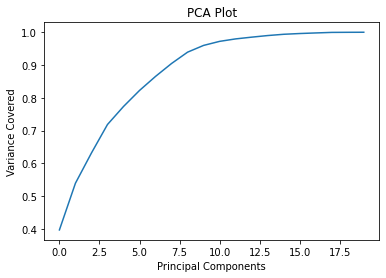

In [32]:
# Lets plot the PCA plot to select the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance Covered")
plt.title("PCA Plot")

From graph we can see arround 10 principal components are able to explain greater than 95% variance. So its safe to consider the 13 pcs. and move further.

In [33]:
pca=PCA(n_components=10)
pca_x=pca.fit_transform(x_scaled)
pca_x=pd.DataFrame(pca_x,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.296416,-0.461316,-0.617669,-1.590310,-2.558126,0.223742,-0.550148,0.820042,0.280801,0.655268
1,-0.057144,2.691296,-0.452168,2.079229,1.102977,-0.994523,-2.453532,0.135644,1.535215,-0.180391
2,-2.545312,1.189567,-0.675301,0.396882,0.278989,0.971056,-0.097784,-0.330995,0.910201,0.112084
3,-3.479988,-1.003088,-0.325145,-0.148929,0.722929,-1.041965,-0.496247,-0.431649,0.709663,-1.326699
4,3.087157,-0.427808,-0.556290,-1.278618,0.333798,1.015726,-0.252589,-0.830602,0.352255,-0.673320
...,...,...,...,...,...,...,...,...,...,...
197595,0.680037,1.536931,-0.872768,-0.461857,-0.171444,0.543480,0.014118,-0.222791,0.669657,-0.019282
197596,0.083280,-0.791877,-0.304508,-0.416213,0.780752,-1.041832,0.786996,0.128076,-0.288754,-0.302076
197597,3.584417,-1.276798,0.572350,1.713769,0.024290,0.913703,-1.867595,1.003332,-0.336730,-0.039301
197598,1.475313,0.119787,-0.161127,0.051976,0.946905,0.976138,-2.100395,1.360553,-0.787552,0.965697


In [34]:
print(data['label'].value_counts()) # data is imbalanced lets use SMOTE before that lets find the best random state.

1    172343
0     25257
Name: label, dtype: int64


# Find the best Random state

In [35]:
# Lets select the proper random state to build best model by using LogisticRegression

from sklearn.linear_model import LogisticRegression

acc_score_test = 0
acc_score_train = 0
rand_state = 0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.30,random_state= i )
    
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    
    y_pred=lr.predict(x_train)
    r1 =accuracy_score(y_train,y_pred)
    
    pred = lr.predict(x_test)   
    r2 =accuracy_score(y_test,pred)
    
    if r2 > acc_score_test and r1 > acc_score_train:
        acc_score_test = r2
        acc_score_train = r1
        rand_state = i
    print(f"at random sate {i}, the training accuracy is:- {acc_score_train}")
    print(f"at random sate {i}, the testing accuracy is:- {acc_score_test}")
    print("\n")
print('Best Training accuracy_score is {} on random state {}'.format(acc_score_train,rand_state))
print('Best Testing accuracy_score is {} on random state {}'.format(acc_score_test,rand_state))

at random sate 1, the training accuracy is:- 0.87881000578369
at random sate 1, the testing accuracy is:- 0.8790991902834008


at random sate 2, the training accuracy is:- 0.87881000578369
at random sate 2, the testing accuracy is:- 0.8790991902834008


at random sate 3, the training accuracy is:- 0.87881000578369
at random sate 3, the testing accuracy is:- 0.8790991902834008


at random sate 4, the training accuracy is:- 0.87881000578369
at random sate 4, the testing accuracy is:- 0.8790991902834008


at random sate 5, the training accuracy is:- 0.87881000578369
at random sate 5, the testing accuracy is:- 0.8790991902834008


at random sate 6, the training accuracy is:- 0.87881000578369
at random sate 6, the testing accuracy is:- 0.8790991902834008


at random sate 7, the training accuracy is:- 0.87881000578369
at random sate 7, the testing accuracy is:- 0.8790991902834008


at random sate 8, the training accuracy is:- 0.87881000578369
at random sate 8, the testing accuracy is:- 0.879

at random sate 65, the training accuracy is:- 0.879157027183343
at random sate 65, the testing accuracy is:- 0.8791835357624831


at random sate 66, the training accuracy is:- 0.879157027183343
at random sate 66, the testing accuracy is:- 0.8791835357624831


at random sate 67, the training accuracy is:- 0.879157027183343
at random sate 67, the testing accuracy is:- 0.8791835357624831


at random sate 68, the training accuracy is:- 0.879157027183343
at random sate 68, the testing accuracy is:- 0.8791835357624831


at random sate 69, the training accuracy is:- 0.879157027183343
at random sate 69, the testing accuracy is:- 0.8791835357624831


at random sate 70, the training accuracy is:- 0.879157027183343
at random sate 70, the testing accuracy is:- 0.8791835357624831


at random sate 71, the training accuracy is:- 0.879157027183343
at random sate 71, the testing accuracy is:- 0.8791835357624831


at random sate 72, the training accuracy is:- 0.879157027183343
at random sate 72, the tes

at random sate 128, the training accuracy is:- 0.879157027183343
at random sate 128, the testing accuracy is:- 0.8791835357624831


at random sate 129, the training accuracy is:- 0.879157027183343
at random sate 129, the testing accuracy is:- 0.8791835357624831


at random sate 130, the training accuracy is:- 0.879157027183343
at random sate 130, the testing accuracy is:- 0.8791835357624831


at random sate 131, the training accuracy is:- 0.879157027183343
at random sate 131, the testing accuracy is:- 0.8791835357624831


at random sate 132, the training accuracy is:- 0.879157027183343
at random sate 132, the testing accuracy is:- 0.8791835357624831


at random sate 133, the training accuracy is:- 0.879157027183343
at random sate 133, the testing accuracy is:- 0.8791835357624831


at random sate 134, the training accuracy is:- 0.879157027183343
at random sate 134, the testing accuracy is:- 0.8791835357624831


at random sate 135, the training accuracy is:- 0.879157027183343
at random s

at random sate 191, the training accuracy is:- 0.879157027183343
at random sate 191, the testing accuracy is:- 0.8791835357624831


at random sate 192, the training accuracy is:- 0.879157027183343
at random sate 192, the testing accuracy is:- 0.8791835357624831


at random sate 193, the training accuracy is:- 0.879157027183343
at random sate 193, the testing accuracy is:- 0.8791835357624831


at random sate 194, the training accuracy is:- 0.879157027183343
at random sate 194, the testing accuracy is:- 0.8791835357624831


at random sate 195, the training accuracy is:- 0.879157027183343
at random sate 195, the testing accuracy is:- 0.8791835357624831


at random sate 196, the training accuracy is:- 0.879157027183343
at random sate 196, the testing accuracy is:- 0.8791835357624831


at random sate 197, the training accuracy is:- 0.879157027183343
at random sate 197, the testing accuracy is:- 0.8791835357624831


at random sate 198, the training accuracy is:- 0.879157027183343
at random s

In [36]:
print('We got our best randoms sate as :',rand_state)

We got our best randoms sate as : 13


In [37]:
#Lets split for train and test data
x_train,x_test,y_train,y_test = train_test_split(pca_x,y,test_size=0.30,random_state= rand_state )

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(138320, 10)
(59280, 10)
(138320,)
(59280,)


In [39]:
# We have imbalance dataset lets use SMOTE
# Lets use of Resampling Techniques to handle Imbalanced Data 
from imblearn.over_sampling import SMOTE
from collections import Counter

ove_smp=SMOTE(0.90)
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)
print(Counter(y_train))
print(Counter(y_train_ns))

Counter({1: 120689, 0: 17631})
Counter({1: 120689, 0: 108620})


# Lets build the model to predict user micro Credit card loan defaulter or not

In [40]:
def print_score(model,x_train_ns,x_test,y_train_ns,y_test,train=True):
    if train:
        y_pred=model.predict(x_train_ns)
        print("Train Report:",accuracy_score(y_train_ns,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",accuracy_score(y_test,pred))
        print("Classification Report:",classification_report(y_test,pred))
        print("Confusion Matrix:",confusion_matrix(y_test,pred))

In [41]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.
from sklearn.model_selection import cross_val_score

def model_accuracy(model,X_train=x_train_ns,y_train=y_train_ns):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =2)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [42]:
# Model no.1
from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(x_train_ns,y_train_ns)

print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(LR,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(LR)

Train Report: 0.760096638160735
Test Report: 0.7778002699055331
Classification Report:               precision    recall  f1-score   support

           0       0.33      0.73      0.46      7626
           1       0.95      0.78      0.86     51654

    accuracy                           0.78     59280
   macro avg       0.64      0.76      0.66     59280
weighted avg       0.87      0.78      0.81     59280

Confusion Matrix: [[ 5569  2057]
 [11115 40539]]
Accuracy: 76.01 %
Standard Deviation: 0.01 %


In [43]:
#Model no.2
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)

print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(dt,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(dt)

Train Report: 0.9924207074297128
Test Report: 0.8002699055330634
Classification Report:               precision    recall  f1-score   support

           0       0.34      0.57      0.42      7626
           1       0.93      0.83      0.88     51654

    accuracy                           0.80     59280
   macro avg       0.63      0.70      0.65     59280
weighted avg       0.85      0.80      0.82     59280

Confusion Matrix: [[ 4346  3280]
 [ 8560 43094]]
Accuracy: 81.89 %
Standard Deviation: 0.22 %


In [44]:
#Model no.3
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()

ada.fit(x_train_ns,y_train_ns)

print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(ada,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(ada)

Train Report: 0.7651422316612082
Test Report: 0.7740384615384616
Classification Report:               precision    recall  f1-score   support

           0       0.33      0.76      0.46      7626
           1       0.96      0.78      0.86     51654

    accuracy                           0.77     59280
   macro avg       0.64      0.77      0.66     59280
weighted avg       0.88      0.77      0.81     59280

Confusion Matrix: [[ 5765  1861]
 [11534 40120]]
Accuracy: 76.22 %
Standard Deviation: 0.07 %


In [45]:
# Model no.4
from sklearn.ensemble import RandomForestClassifier

rand_clf= RandomForestClassifier()
rand_clf.fit(x_train_ns,y_train_ns)

print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(rand_clf,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(rand_clf)

Train Report: 0.9924119855740507
Test Report: 0.8576079622132253
Classification Report:               precision    recall  f1-score   support

           0       0.46      0.57      0.51      7626
           1       0.93      0.90      0.92     51654

    accuracy                           0.86     59280
   macro avg       0.70      0.73      0.71     59280
weighted avg       0.87      0.86      0.86     59280

Confusion Matrix: [[ 4327  3299]
 [ 5142 46512]]
Accuracy: 88.08 %
Standard Deviation: 0.39 %


In [46]:
#Model no.5
import xgboost as xgb

xgb=xgb.XGBClassifier()

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.8292478707769865
Test Report: 0.8037112010796221
Classification Report:               precision    recall  f1-score   support

           0       0.37      0.76      0.50      7626
           1       0.96      0.81      0.88     51654

    accuracy                           0.80     59280
   macro avg       0.66      0.78      0.69     59280
weighted avg       0.88      0.80      0.83     59280

Confusion Matrix: [[ 5782  1844]
 [ 9792 41862]]
Accuracy: 81.03 %
Standard Deviation: 0.06 %


# lets check ROC AUC curve for fitted model

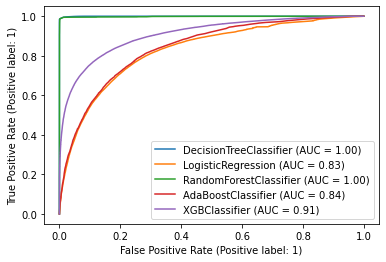

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(LR,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(rand_clf,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(ada,x_train_ns,y_train_ns,ax=disp.ax_)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets check how our model works on test data

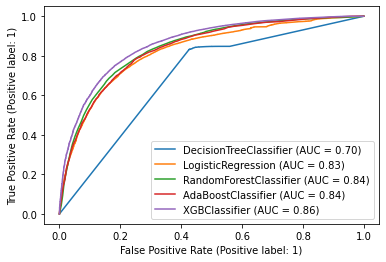

In [48]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(LR,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)

# Looking at the accuracy and ROC curve i m selecting XGBClassifier lets get better accuracy by hyper tuning parameter

# HyperParameter Tuning 

In [49]:
# Hyper tuning by using RandomizedSearchCV With XGB
from sklearn.model_selection import RandomizedSearchCV

para={'n_estimators':[7,10,8],'gamma':[0.25,0.1,0.3,0.092],'max_depth':[2,4,11,10,8,9],'random_state':[20,10,30]}
rand=RandomizedSearchCV(estimator=xgb, cv=5,param_distributions=para)
rand.fit(x_train,y_train)

rand.best_params_

{'random_state': 30, 'n_estimators': 7, 'max_depth': 9, 'gamma': 0.1}

In [78]:
#Model no.5
import xgboost as xgb

xgb=xgb.XGBClassifier(random_state= 31, n_estimators= 6, max_depth= 11, gamma= 0.092)

xgb.fit(x_train_ns,y_train_ns)

print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=True)
print_score(xgb,x_train_ns,x_test,y_train_ns,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.8481612147800566
Test Report: 0.8112516869095816
Classification Report:               precision    recall  f1-score   support

           0       0.38      0.73      0.50      7626
           1       0.95      0.82      0.88     51654

    accuracy                           0.81     59280
   macro avg       0.67      0.78      0.69     59280
weighted avg       0.88      0.81      0.83     59280

Confusion Matrix: [[ 5604  2022]
 [ 9167 42487]]
Accuracy: 81.63 %
Standard Deviation: 0.12 %


# Lets Check Curve again after hyper tune parameter RandomizedSearchCV on tarin data

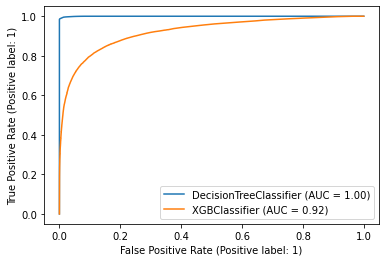

In [79]:
from sklearn.metrics import roc_curve,roc_auc_score, plot_roc_curve

disp=plot_roc_curve(dt,x_train_ns,y_train_ns)
plot_roc_curve(xgb,x_train_ns,y_train_ns,ax=disp.ax_)

# Lets Check Curve again after hyper tune parameter RandomizedSearchCV on test data

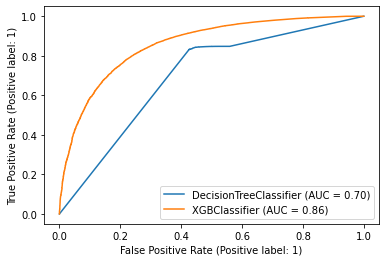

In [80]:
disp=plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)

# Looking at accuracy 86%, ROC AUC Curve & confusion matrix i m selecting XGBClassifier with Hyper tuning by using RandomizedSearchCV with Kfold cross validation method.

In [81]:
#save model
import pickle
Filename='Finalized_model_Micro_Credit_Card.pickle'
pickle.dump(xgb,open(Filename,'wb'))